In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)

In [13]:
Dataset = pd.read_csv("Data\AirPassengers.csv")

In [14]:
Dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
Dataset['Month']= pd.to_datetime(Dataset['Month'])

In [17]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [18]:
Dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
df = Dataset.set_index("Month")

<AxesSubplot:xlabel='Month'>

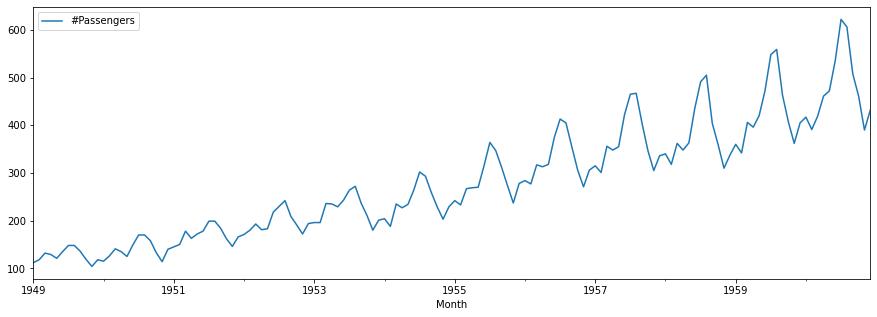

In [20]:
df.plot()

## Alternative code

<AxesSubplot:xlabel='Month'>

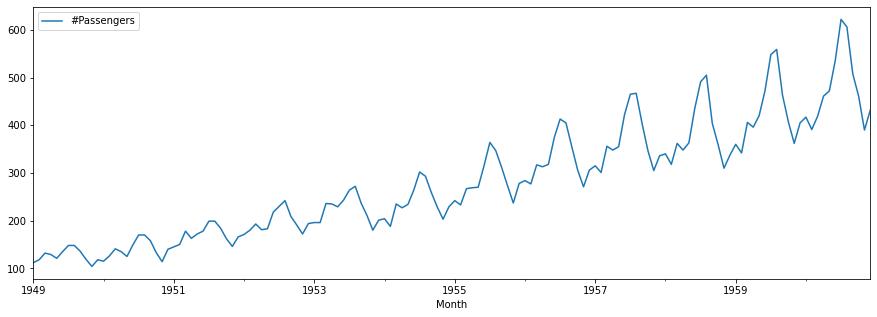

In [24]:
df_master = pd.read_csv("Data\AirPassengers.csv", parse_dates=["Month"], index_col="Month")
df_master.plot()

# Stationality

In [71]:
from statsmodels.tsa.stattools import adfuller


def adf_test(dataframe) -> None:
    adf, pvalue, _, _, critical_values, _ = adfuller(dataframe)
    stationary_value = pvalue <= 0.05
    test_critical_value = round(critical_values['5%'], 2)
    print(
        f"Is the time series stationary ? {stationary_value}\n"
        f"Test statistic value (adf) =  {round(adf,2)}\n" 
        f"P value = {round(pvalue,2)}\n" 
        f"test critical value ('5%') = {test_critical_value}")

adf_test(df)

Is the time series stationary ? False
Test statistic value (adf) =  0.82
P value = 0.99
test critical value ('5%') = -2.88


## Why 5% ?

# Make the time series stationary

In [72]:
df.diff().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


<AxesSubplot:xlabel='Month'>

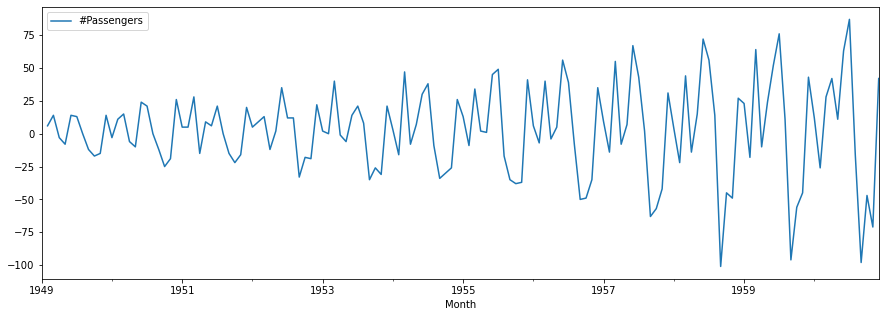

In [73]:
df.diff().plot()

Is the time series stationary ? False
Test statistic value (adf) =  -1.72
P value = 0.42
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

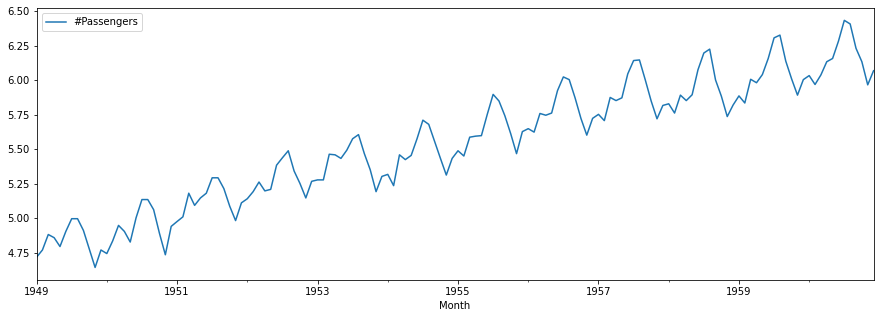

In [74]:
df_without_exponential_growth = np.log(df)
adf_test(df_without_exponential_growth)
df_without_exponential_growth.plot()

Is the time series stationary ? False
Test statistic value (adf) =  -2.72
P value = 0.07
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

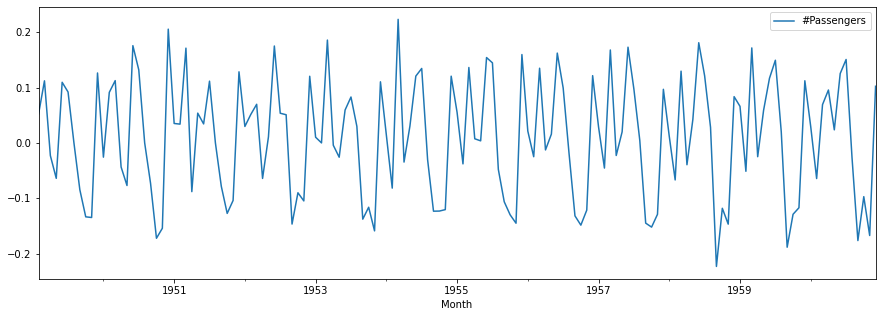

In [83]:
df_log_1_diff = df_without_exponential_growth.diff().dropna()
adf_test(df_log_1_diff)
df_log_1_diff.plot()

Is the time series stationary ? False
Test statistic value (adf) =  -2.83
P value = 0.05
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

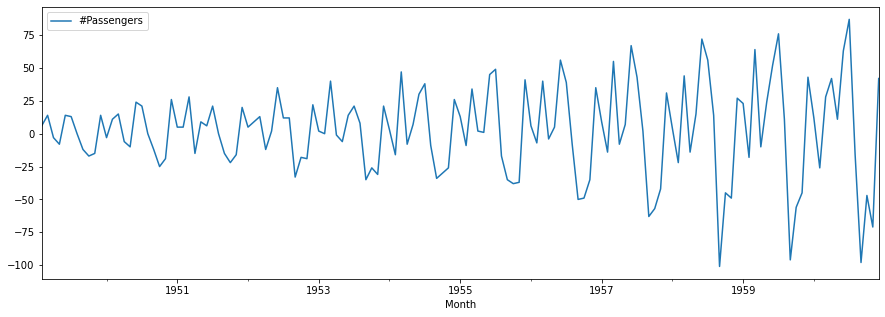

In [77]:
df_1_diff = df.diff().dropna()
adf_test(df_1_diff)
df_1_diff.plot()

Is the time series stationary ? True
Test statistic value (adf) =  -2.96
P value = 0.04
test critical value ('5%') = -2.88


<AxesSubplot:xlabel='Month'>

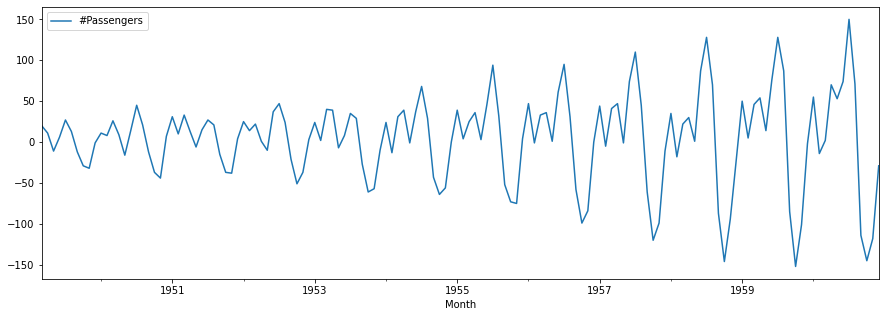

In [78]:
df_2_diff = df.diff(2).dropna()
adf_test(df_2_diff)
df_2_diff.plot()

# Autocorrelation

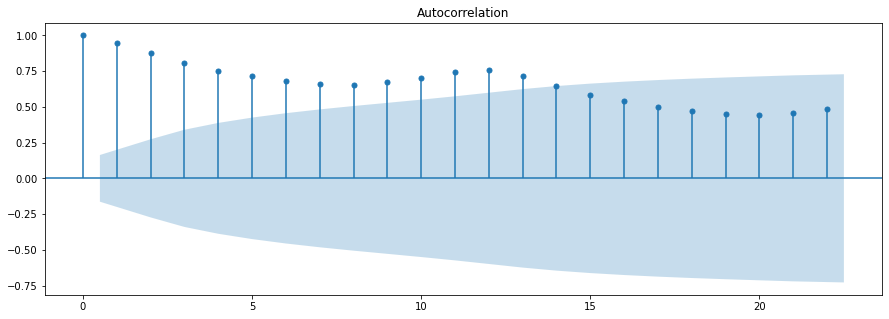

In [80]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_acf(df)

<AxesSubplot:xlabel='Month'>

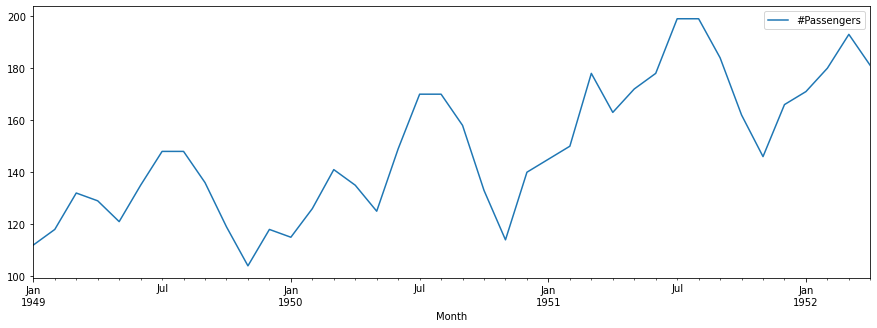

In [81]:
df.head(40).plot()

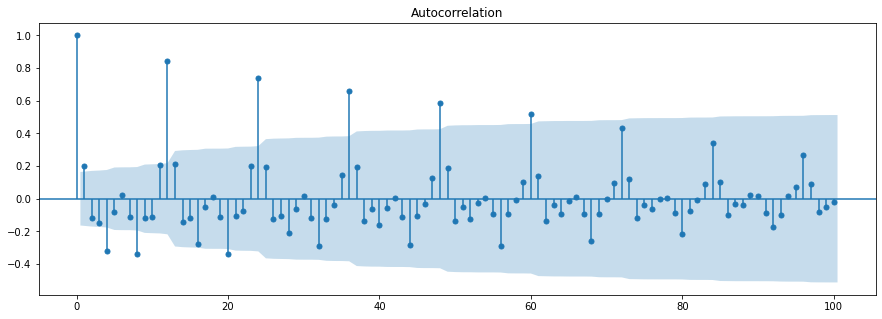

In [85]:
_ = plot_acf(df_log_1_diff, lags=100)

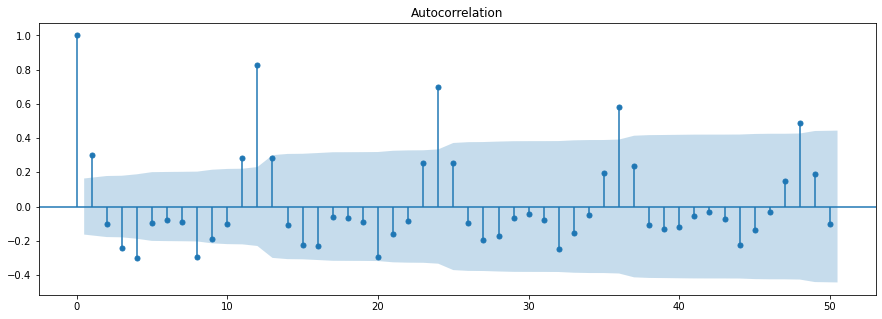

In [87]:
_ = plot_acf(df_1_diff, lags=50)

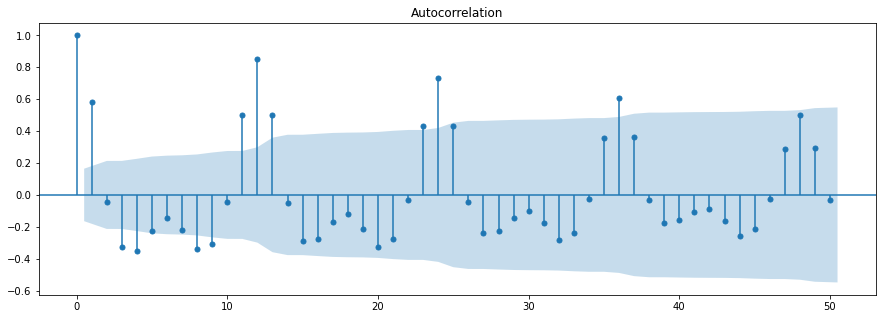

In [96]:
_ = plot_acf(df_2_diff, lags=50)

# Partial correlation

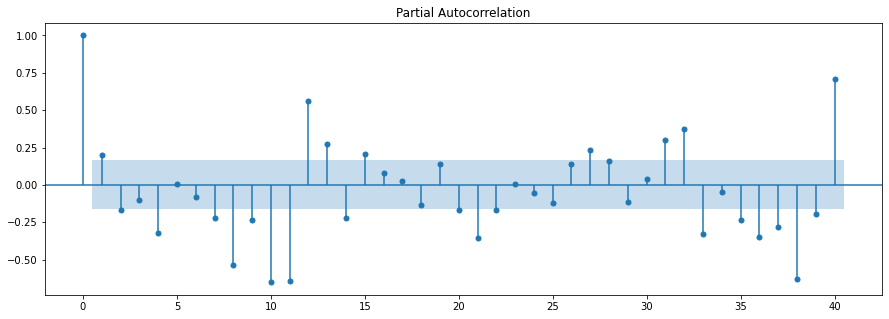

In [94]:
from statsmodels.graphics.tsaplots import plot_acf

_ = plot_pacf(df_log_1_diff, lags=40)

C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


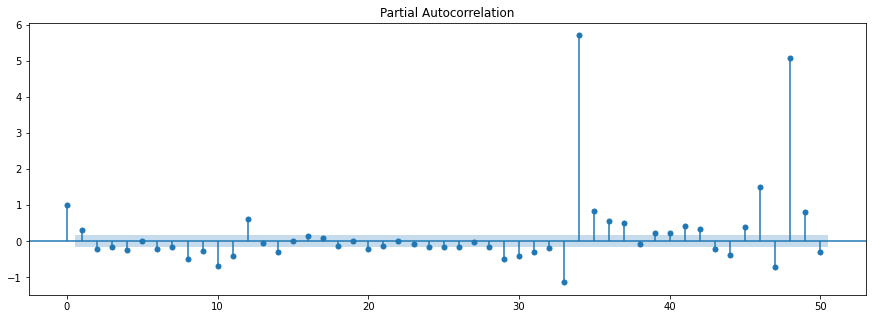

In [95]:
_ = plot_pacf(df_1_diff, lags=50)